# Volatilty Prediction of USD/INR

In [2]:
import pandas as pd
usd_inr_data = pd.read_csv("INR=Original.csv")

In [3]:
usd_inr_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.615002,45.709999,45.709999,0.0
1,2003-12-02,45.709000,45.719002,45.560001,45.629002,45.629002,0.0
2,2003-12-03,45.632000,45.655998,45.474998,45.549999,45.549999,0.0
3,2003-12-04,45.548000,45.612999,45.519001,45.548000,45.548000,0.0
4,2003-12-05,45.549999,45.566002,45.449001,45.449001,45.449001,0.0


In [4]:
usd_inr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4389 entries, 0 to 4388
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4389 non-null   object 
 1   Open       4357 non-null   float64
 2   High       4357 non-null   float64
 3   Low        4357 non-null   float64
 4   Close      4357 non-null   float64
 5   Adj Close  4357 non-null   float64
 6   Volume     4357 non-null   float64
dtypes: float64(6), object(1)
memory usage: 240.1+ KB


In [5]:
usd_inr_data.isna().value_counts()

Date   Open   High   Low    Close  Adj Close  Volume
False  False  False  False  False  False      False     4357
       True   True   True   True   True       True        32
dtype: int64

# Data Preprocessing and Data Preparation

In [6]:
usd_inr_data[pd.isna(usd_inr_data).any(axis=1)]

,Date,Open,High,Low,Close,Adj Close,Volume
95,2004-04-12,NaN,NaN,NaN,NaN,NaN,NaN
238,2004-10-28,NaN,NaN,NaN,NaN,NaN,NaN
472,2005-09-21,NaN,NaN,NaN,NaN,NaN,NaN
985,2007-09-10,NaN,NaN,NaN,NaN,NaN,NaN
1040,2007-11-26,NaN,NaN,NaN,NaN,NaN,NaN
1056,2007-12-18,NaN,NaN,NaN,NaN,NaN,NaN
1131,2008-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1153,2008-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1196,2008-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1219,2008-08-01,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
usd_inr_data_na_removed = usd_inr_data.dropna()

In [8]:
usd_inr_data_na_removed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4357 entries, 0 to 4388
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4357 non-null   object 
 1   Open       4357 non-null   float64
 2   High       4357 non-null   float64
 3   Low        4357 non-null   float64
 4   Close      4357 non-null   float64
 5   Adj Close  4357 non-null   float64
 6   Volume     4357 non-null   float64
dtypes: float64(6), object(1)
memory usage: 272.3+ KB


In [9]:
datetimeOfDateColumn = usd_inr_data_na_removed.Date.apply(lambda string_value : pd.to_datetime(string_value))
usd_inr_data_na_removed.insert(value = datetimeOfDateColumn,column='Date_Object', loc=0)
usd_inr_data_na_removed = usd_inr_data_na_removed.drop('Date', axis=1)
usd_inr_data_na_removed.head()

,Date_Object,Open,High,Low,Close,Adj Close,Volume
0,2003-12-01,45.709000,45.728001,45.615002,45.709999,45.709999,0.0
1,2003-12-02,45.709000,45.719002,45.560001,45.629002,45.629002,0.0
2,2003-12-03,45.632000,45.655998,45.474998,45.549999,45.549999,0.0
3,2003-12-04,45.548000,45.612999,45.519001,45.548000,45.548000,0.0
4,2003-12-05,45.549999,45.566002,45.449001,45.449001,45.449001,0.0


# Calcuate the different Measures of the Volatility

In [10]:
def create_volatility_estimate_dataset(dataset, time_interval=25, volatility_measure="standard deviation") :
    import math
    if dataset.empty:
        return None
    #dataset.High  = column index = 2
    #dataset.Low   = column index = 3
    #dataset.Close = column index = 4
    #dataset.Open  = column index = 1
    hl = dataset.iloc[:,2]/dataset.iloc[:,3]
    co = dataset.iloc[:,4]/dataset.iloc[:,1]
    high_by_low = hl.apply(lambda x : math.log(math.pow(x,2)))
    close_by_open = co.apply(lambda x : math.log(math.pow(x,2)))
    
    if 'high_by_low' in dataset.columns:
        dataset = dataset.drop('high_by_low', axis=1)
    if 'close_by_open' in dataset.columns:
        dataset = dataset.drop('close_by_open', axis=1)
    
    dataset.insert(value = high_by_low,column='high_by_low', loc=7)
    dataset.insert(value = close_by_open,column='close_by_open', loc=8)
    
    if volatility_measure == "standard deviation" :
        standard_deviation_values = []
        for i in range(0,len(dataset.Price)-time_interval-1) :
            time_step_values=dataset.iloc[:,1].loc[i:(i+time_interval):,]
            standard_deviation_values.append(time_step_values.std())
        return standard_deviation_values
    elif volatility_measure == "parkinson volatility":
        parkinson_constant=1/(4*math.log(2))
        parkinson_volatility_values=[]
        for i in range(0,len(high_by_low)-time_interval-1) :
            time_step_values=high_by_low.loc[i:(i+time_interval):,]
            parkinson_volatility = parkinson_constant * time_step_values.mean()
            parkinson_volatility_values.append(parkinson_volatility)
        return parkinson_volatility_values
    elif volatility_measure == "garmin klass volatility" :
        gk_costant=(2*math.log(2)-1)
        factored_high_by_low = high_by_low.apply(lambda x : 0.5*x)
        close_by_open = dataset.close_by_open
        factored_close_by_open = close_by_open.apply(lambda x: gk_costant * x)
        diff_factored_values = factored_high_by_low - factored_close_by_open
        gk_volatility_values=[]
        for i in range(0,len(diff_factored_values)-time_interval-1) :
            gk_volatility_values.append(math.sqrt(diff_factored_values.loc[i:(i+time_interval):,].mean()))
        return gk_volatility_values
    else :
        return None

In [11]:
data=create_volatility_estimate_dataset(usd_inr_data_na_removed, volatility_measure='garmin klass volatility')

In [12]:
data

[0.05205059695011639,
 0.05182702131730361,
 0.05255196691289809,
 0.0512695283527819,
 0.05336529887461736,
 0.05249233067414908,
 0.0529295434521709,
 0.0532573001701018,
 0.052340736812499435,
 0.052512358693030226,
 0.05253820187125098,
 0.052573448006033315,
 0.052754276180126985,
 0.05180569388754638,
 0.05280880933274516,
 0.05313451191081971,
 0.05301001236607775,
 0.05196840913394676,
 0.051846346902345145,
 0.054519757863708586,
 0.05470392556894311,
 0.05468723652250478,
 0.05374017618899663,
 0.053675827619604655,
 0.05465144862517897,
 0.05462396866233331,
 0.05445432491956187,
 0.054459136475100145,
 0.05279156337856876,
 0.05316689471819005,
 0.05097518407064524,
 0.050807894350647816,
 0.05045351760790449,
 0.04970499373622749,
 0.049902560169448856,
 0.050332550184077486,
 0.050020968764281075,
 0.050709629056490756,
 0.05030322797975063,
 0.050150578941292635,
 0.04947969001088346,
 0.04974645283642915,
 0.050540280279838944,
 0.049877789809797096,
 0.0503770289532945

In [13]:
len(data)

4331

Plot the calculated volatility of the data

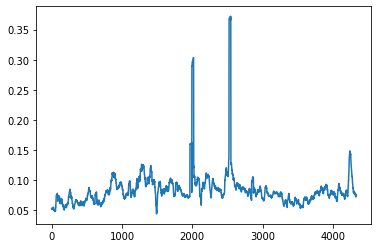

In [15]:
import matplotlib.pyplot as plt
plt.plot(data)

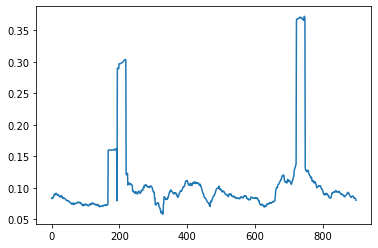

In [16]:
plt.plot(data[1800:2700])

# Split the data to train - test

In [17]:
def split_train_test_data(dataset, train_size_percentage=65) :
    if len(dataset) == 0:
        return None
    train_set_size = int(len(dataset)*train_size_percentage/100)
    return dataset[0:train_set_size], dataset[train_set_size:len(dataset)]

In [18]:
train_data, test_data = split_train_test_data(data)

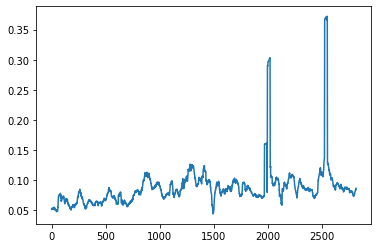

In [19]:
plt.plot(train_data)

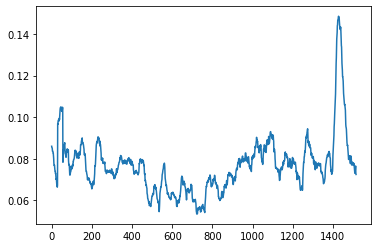

In [20]:
plt.plot(test_data)

In [21]:
def prepare_data(dataset, time_interval=25):
    dataX, dataY = [], []
    for i in range(0, len(dataset)-time_interval-1) :
        dataX.append(dataset[i:i+time_interval])
        dataY.append(dataset[i+time_interval])
    return np.array(dataX), np.array(dataY)

In [23]:
import numpy as np
train_data_X, train_data_Y = prepare_data(train_data)
test_data_X, test_data_Y = prepare_data(test_data)

In [24]:
train_data_X.shape

(2789, 25)

In [25]:
train_data_Y.shape

(2789,)

In [26]:
test_data_X.shape, test_data_Y.shape

((1490, 25), (1490,))

Train and Test data as Data frame

In [27]:
labels=[]
for i in range(1,26):
    label = "Day " + str(i)
    labels.append(label)

In [28]:
data_frame = pd.DataFrame.from_records(train_data_X, columns=labels)
data_frame['Y'] = train_data_Y
data_frame.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 17,Day 18,Day 19,Day 20,Day 21,Day 22,Day 23,Day 24,Day 25,Y
0,0.052051,0.051827,0.052552,0.051270,0.053365,0.052492,0.052930,0.053257,0.052341,0.052512,...,0.053010,0.051968,0.051846,0.054520,0.054704,0.054687,0.053740,0.053676,0.054651,0.054624
1,0.051827,0.052552,0.051270,0.053365,0.052492,0.052930,0.053257,0.052341,0.052512,0.052538,...,0.051968,0.051846,0.054520,0.054704,0.054687,0.053740,0.053676,0.054651,0.054624,0.054454
2,0.052552,0.051270,0.053365,0.052492,0.052930,0.053257,0.052341,0.052512,0.052538,0.052573,...,0.051846,0.054520,0.054704,0.054687,0.053740,0.053676,0.054651,0.054624,0.054454,0.054459
3,0.051270,0.053365,0.052492,0.052930,0.053257,0.052341,0.052512,0.052538,0.052573,0.052754,...,0.054520,0.054704,0.054687,0.053740,0.053676,0.054651,0.054624,0.054454,0.054459,0.052792
4,0.053365,0.052492,0.052930,0.053257,0.052341,0.052512,0.052538,0.052573,0.052754,0.051806,...,0.054704,0.054687,0.053740,0.053676,0.054651,0.054624,0.054454,0.054459,0.052792,0.053167


In [29]:
data_frame_test = pd.DataFrame.from_records(test_data_X, columns=labels)
data_frame_test['Y'] = test_data_Y
data_frame_test.head()

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 17,Day 18,Day 19,Day 20,Day 21,Day 22,Day 23,Day 24,Day 25,Y
0,0.086024,0.085451,0.085337,0.084920,0.083590,0.083646,0.083557,0.082737,0.082716,0.081515,...,0.074630,0.073933,0.073933,0.072842,0.072960,0.071232,0.070112,0.070315,0.069669,0.068105
1,0.085451,0.085337,0.084920,0.083590,0.083646,0.083557,0.082737,0.082716,0.081515,0.080167,...,0.073933,0.073933,0.072842,0.072960,0.071232,0.070112,0.070315,0.069669,0.068105,0.067674
2,0.085337,0.084920,0.083590,0.083646,0.083557,0.082737,0.082716,0.081515,0.080167,0.077925,...,0.073933,0.072842,0.072960,0.071232,0.070112,0.070315,0.069669,0.068105,0.067674,0.066787
3,0.084920,0.083590,0.083646,0.083557,0.082737,0.082716,0.081515,0.080167,0.077925,0.076967,...,0.072842,0.072960,0.071232,0.070112,0.070315,0.069669,0.068105,0.067674,0.066787,0.066369
4,0.083590,0.083646,0.083557,0.082737,0.082716,0.081515,0.080167,0.077925,0.076967,0.076766,...,0.072960,0.071232,0.070112,0.070315,0.069669,0.068105,0.067674,0.066787,0.066369,0.067285


Apply Linear Regression Technique

In [31]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(train_data_X, train_data_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predict and calculate the root mean square error for the train and test data

In [32]:
train_predict = linear_reg.predict(train_data_X)

In [35]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_true=train_data_Y, y_pred=train_predict))

0.008525028298061909

In [36]:
test_predict = linear_reg.predict(test_data_X)

In [37]:
math.sqrt(mean_squared_error(y_true=test_data_Y, y_pred=test_predict))

0.0016067044428071079

# Predict the next 25 days volatilities

In [38]:
def predict_n_values(dataset, n=25):
    predictX, predictY =[],[]
    dataset_copy = np.array(dataset)
    start_index=dataset_copy.shape[0]-n
    for i in range(1,n+1):
        print(start_index)
        predictX = dataset_copy[start_index:start_index+n,]
        print("{} day input {}".format(i,predictX))
        next_predicted_value =linear_reg.predict(predictX.reshape(1,-1))
        print("{} day output".format(next_predicted_value))
        predictY.append(next_predicted_value)
        dataset_copy= np.append(dataset_copy,next_predicted_value)
        start_index= start_index+1
    return np.array(predictY)

In [39]:
predict_next_25_days = predict_n_values(data)

4306
1 day input [0.08058796 0.07920462 0.07712311 0.07749933 0.07722488 0.07705433
 0.07839164 0.07794356 0.07795207 0.07725716 0.07781163 0.07697527
 0.0769564  0.07781025 0.0773554  0.07616511 0.07482398 0.07386332
 0.07306814 0.07358678 0.07422069 0.07527803 0.07654344 0.07309776
 0.0724819 ]
[0.07297152] day output
4307
2 day input [0.07920462 0.07712311 0.07749933 0.07722488 0.07705433 0.07839164
 0.07794356 0.07795207 0.07725716 0.07781163 0.07697527 0.0769564
 0.07781025 0.0773554  0.07616511 0.07482398 0.07386332 0.07306814
 0.07358678 0.07422069 0.07527803 0.07654344 0.07309776 0.0724819
 0.07297152]
[0.07344987] day output
4308
3 day input [0.07712311 0.07749933 0.07722488 0.07705433 0.07839164 0.07794356
 0.07795207 0.07725716 0.07781163 0.07697527 0.0769564  0.07781025
 0.0773554  0.07616511 0.07482398 0.07386332 0.07306814 0.07358678
 0.07422069 0.07527803 0.07654344 0.07309776 0.0724819  0.07297152
 0.07344987]
[0.07389764] day output
4309
4 day input [0.07749933 0.07722

In [40]:
predict_next_25_days

array([[0.07297152],
       [0.07344987],
       [0.07389764],
       [0.07423313],
       [0.07465347],
       [0.07507756],
       [0.07550477],
       [0.07595349],
       [0.07637111],
       [0.07676213],
       [0.07715224],
       [0.07755988],
       [0.07795417],
       [0.07835164],
       [0.07876771],
       [0.07920064],
       [0.07965531],
       [0.08008268],
       [0.08049741],
       [0.08094709],
       [0.08137536],
       [0.08175035],
       [0.08213024],
       [0.08255898],
       [0.08298491]])

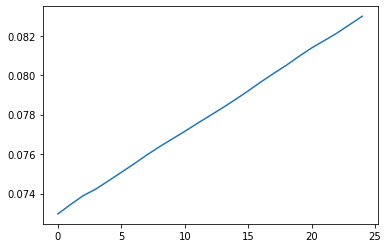

In [41]:
plt.plot(predict_next_25_days.ravel())

In [42]:
day_new=np.arange(1,301)
day_pred=np.arange(301,326)

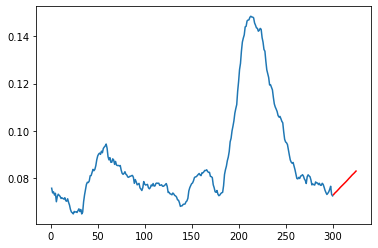

In [43]:
plt.plot(day_new, np.array(data[len(data)-300:]).reshape(-1,1))
plt.plot(day_pred, predict_next_25_days, 'r')

# Predict the FX rate values of USD/INR for next 25 days

In [44]:
close_price = usd_inr_data_na_removed.Close

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(np.array(close_price).reshape(-1,1))

In [46]:
scaled_data

array([[0.17300456],
       [0.17090211],
       [0.16885141],
       ...,
       [0.89642578],
       [0.89443214],
       [0.90158072]])

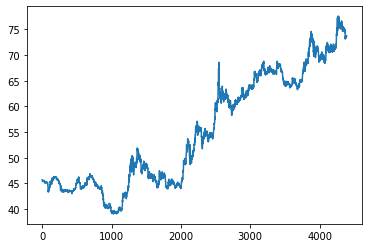

In [47]:
plt.plot(close_price)

In [48]:
train_close_data, test_close_data = split_train_test_data(scaled_data)

In [49]:
train_close_data_X, train_close_data_Y = prepare_data(train_close_data)
test_close_data_X,  test_close_data_Y = prepare_data(test_close_data)

In [58]:
train_close_data_X.shape, train_close_data_Y.shape

((2806, 25, 1), (2806, 1))

In [59]:
linear_reg.fit(train_close_data_X.reshape(2806,25), train_close_data_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
from sklearn.metrics import mean_squared_error

In [64]:
predict_close_train = linear_reg.predict(train_close_data_X.reshape(2806,25))
predict_close_test = linear_reg.predict(test_close_data_X.reshape(test_close_data_X.shape[0],test_close_data_X.shape[1]))

In [65]:
math.sqrt(mean_squared_error(y_true=train_close_data_Y, y_pred=predict_close_train))

0.0073102489431209235

In [66]:
math.sqrt(mean_squared_error(y_true=test_close_data_Y, y_pred=predict_close_test))

0.007722408419235479

In [67]:
predicted_25_close_prices = predict_n_values(scaled_data)

4332
1 day input [[0.93328751]
 [0.9312602 ]
 [0.91771583]
 [0.9190785 ]
 [0.91356514]
 [0.90147951]
 [0.88470614]
 [0.89876699]
 [0.88838409]
 [0.88782601]
 [0.89300193]
 [0.88891105]
 [0.89824795]
 [0.90179876]
 [0.89565226]
 [0.8950629 ]
 [0.89379884]
 [0.89733934]
 [0.90214155]
 [0.89567027]
 [0.89652442]
 [0.89525758]
 [0.89642578]
 [0.89443214]
 [0.90158072]]
[[0.90085423]] day output
4333
2 day input [0.9312602  0.91771583 0.9190785  0.91356514 0.90147951 0.88470614
 0.89876699 0.88838409 0.88782601 0.89300193 0.88891105 0.89824795
 0.90179876 0.89565226 0.8950629  0.89379884 0.89733934 0.90214155
 0.89567027 0.89652442 0.89525758 0.89642578 0.89443214 0.90158072
 0.90085423]
[[0.9023686]] day output
4334
3 day input [0.91771583 0.9190785  0.91356514 0.90147951 0.88470614 0.89876699
 0.88838409 0.88782601 0.89300193 0.88891105 0.89824795 0.90179876
 0.89565226 0.8950629  0.89379884 0.89733934 0.90214155 0.89567027
 0.89652442 0.89525758 0.89642578 0.89443214 0.90158072 0.9008542

In [71]:
predicted_25_close_prices.shape

(25, 1, 1)

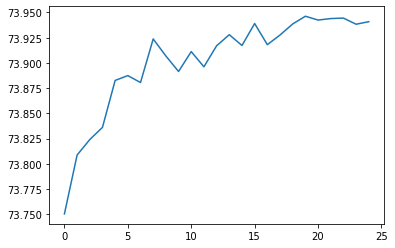

In [73]:
plt.plot(scaler.inverse_transform(predicted_25_close_prices.reshape(25,1)))

In [90]:
day_new=np.arange(1,101)
day_pred=np.arange(101,126)

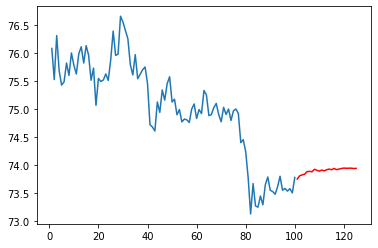

In [96]:
plt.plot(day_new, np.array(scaler.inverse_transform(scaled_data[len(scaled_data)-100:])))
plt.plot(day_pred, scaler.inverse_transform(predicted_25_close_prices.reshape(25,1)), 'r')

In [99]:
scaler.inverse_transform(predicted_25_close_prices.reshape(25,1))

array([[73.75040906],
       [73.80875002],
       [73.82410521],
       [73.8361602 ],
       [73.882692  ],
       [73.88747482],
       [73.88060324],
       [73.92380954],
       [73.9069193 ],
       [73.89154106],
       [73.91123636],
       [73.89619351],
       [73.9170086 ],
       [73.92800451],
       [73.917317  ],
       [73.93906924],
       [73.91812083],
       [73.92767405],
       [73.93865472],
       [73.94628867],
       [73.94251717],
       [73.94398566],
       [73.94447098],
       [73.93836903],
       [73.94089939]])